In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4]:
df = sns.load_dataset('tips')
df = pd.get_dummies(df,drop_first=True)
y_col = 'tip'
X = df.drop(columns=[y_col])
y = df[y_col]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)



In [5]:
from sklearn import tree
model = tree.DecisionTreeRegressor(max_depth=4)
model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=4)

In [6]:
model.predict(X_test)

array([2.65967742, 3.48      , 2.65967742, 3.075     , 4.1       ,
       3.075     , 3.48      , 3.36428571, 3.48      , 4.73823529,
       2.66625   , 2.66625   , 2.470625  , 1.8085    , 2.470625  ,
       3.78791667, 1.8085    , 2.470625  , 2.65967742, 3.78791667,
       3.78791667, 2.66625   , 1.91857143, 2.470625  , 2.470625  ,
       4.1       , 1.8085    , 3.78791667, 3.78791667, 1.91857143,
       2.470625  , 1.8085    , 1.91857143, 1.8085    , 2.65967742,
       2.470625  , 2.65967742, 1.8085    , 6.73      , 1.91857143,
       1.8085    , 1.8085    , 1.91857143, 3.78791667, 1.8085    ,
       2.65967742, 2.65967742, 3.36428571, 2.65967742, 3.78791667,
       3.36428571, 3.48      , 3.48      , 6.73      , 1.8085    ,
       1.8085    , 3.78791667, 3.78791667, 2.470625  , 1.8085    ,
       3.36428571, 1.91857143, 3.36428571, 3.78791667, 3.78791667,
       1.91857143, 4.1       , 2.66625   , 1.8085    , 3.36428571,
       1.91857143, 1.8085    , 3.78791667, 2.470625  ])

In [7]:
# R-squared
model.score(X_test,y_test)

0.3590618660303134

## 決定木の可視化

In [8]:
y_train.loc[X_train[X_train['total_bill']>20.49].index].mean()

3.948

findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.


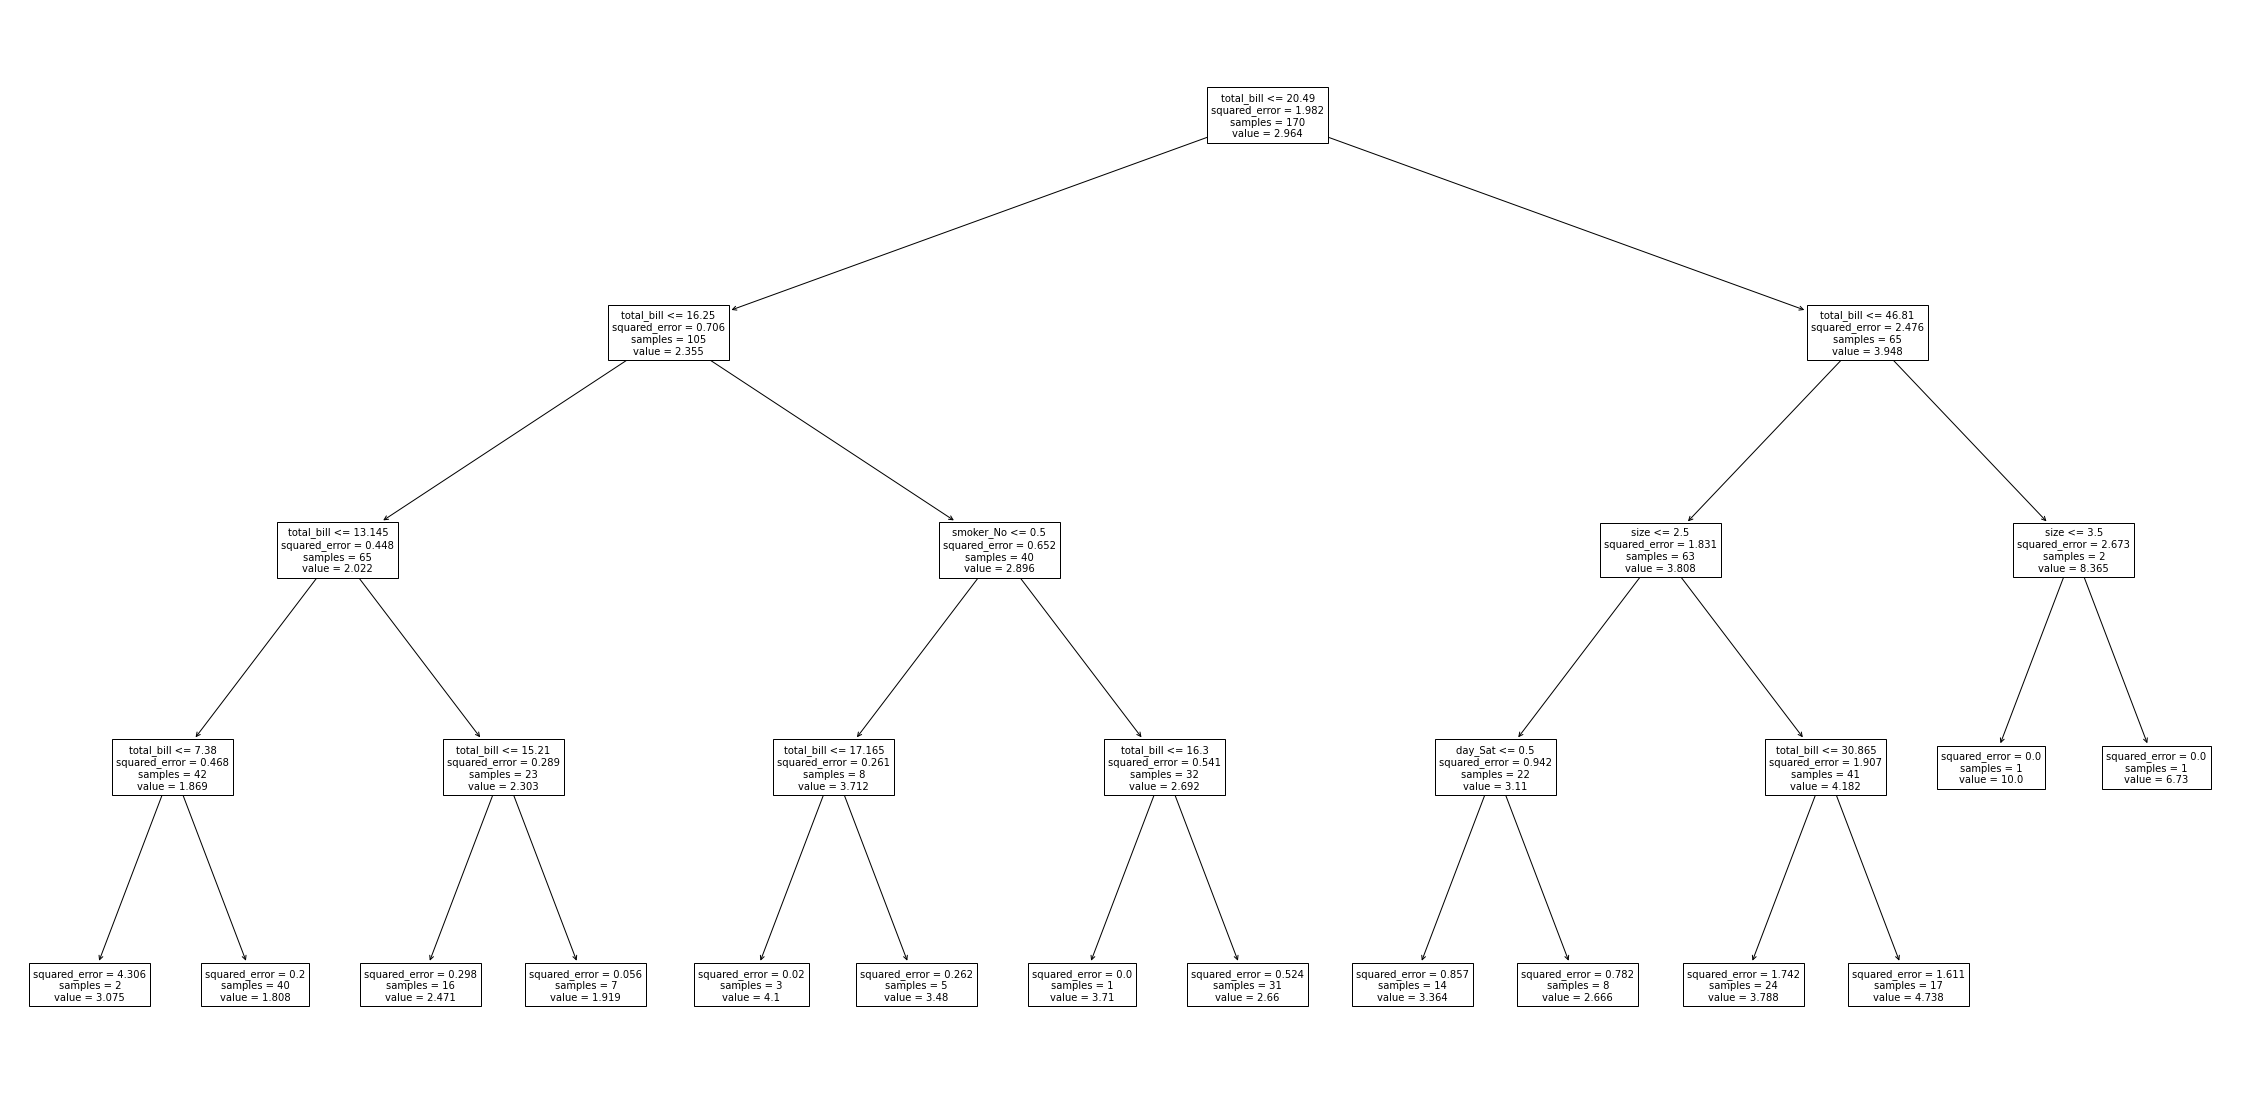

In [9]:
plt.figure(figsize=(40,20))
_ =  tree.plot_tree(model, fontsize=10,feature_names=model.feature_names_in_)

In [10]:
print(tree.export_text(model, feature_names=list(model.feature_names_in_)))

|--- total_bill <= 20.49
|   |--- total_bill <= 16.25
|   |   |--- total_bill <= 13.14
|   |   |   |--- total_bill <= 7.38
|   |   |   |   |--- value: [3.08]
|   |   |   |--- total_bill >  7.38
|   |   |   |   |--- value: [1.81]
|   |   |--- total_bill >  13.14
|   |   |   |--- total_bill <= 15.21
|   |   |   |   |--- value: [2.47]
|   |   |   |--- total_bill >  15.21
|   |   |   |   |--- value: [1.92]
|   |--- total_bill >  16.25
|   |   |--- smoker_No <= 0.50
|   |   |   |--- total_bill <= 17.16
|   |   |   |   |--- value: [4.10]
|   |   |   |--- total_bill >  17.16
|   |   |   |   |--- value: [3.48]
|   |   |--- smoker_No >  0.50
|   |   |   |--- total_bill <= 16.30
|   |   |   |   |--- value: [3.71]
|   |   |   |--- total_bill >  16.30
|   |   |   |   |--- value: [2.66]
|--- total_bill >  20.49
|   |--- total_bill <= 46.81
|   |   |--- size <= 2.50
|   |   |   |--- day_Sat <= 0.50
|   |   |   |   |--- value: [3.36]
|   |   |   |--- day_Sat >  0.50
|   |   |   |   |--- value: [2.67]

## 決定木の特徴量の重要度

In [11]:
model.feature_importances_

array([0.85278323, 0.10370839, 0.        , 0.03169922, 0.        ,
       0.01180916, 0.        , 0.        ])

In [12]:
model.feature_names_in_

array(['total_bill', 'size', 'sex_Female', 'smoker_No', 'day_Fri',
       'day_Sat', 'day_Sun', 'time_Dinner'], dtype=object)

<BarContainer object of 8 artists>

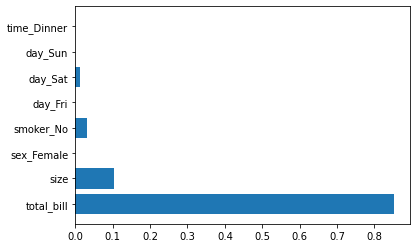

In [13]:
plt.barh(model.feature_names_in_,model.feature_importances_)

## Minimal Cost Complexity Pruning

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [15]:
model = tree.DecisionTreeRegressor(random_state=0)
path = model.cost_complexity_pruning_path(X_train,y_train)

In [16]:
eff_alphas = path.ccp_alphas

In [19]:
models = []
for eff_alpha in eff_alphas:
    model = tree.DecisionTreeRegressor(random_state=0,ccp_alpha=eff_alpha)
    model.fit(X_train,y_train)
    models.append(model)

In [25]:
train_scores = [mean_squared_error(y_train, model.predict(X_train)) for model in models]
test_scores = [mean_squared_error(y_test, model.predict(X_test)) for model in models]

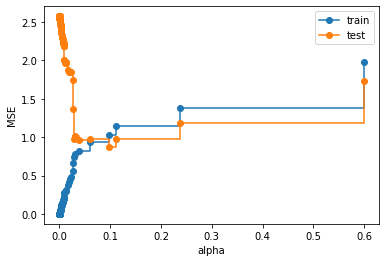

In [28]:
plt.plot(eff_alphas,train_scores,marker='o',label='train',drawstyle='steps-post')
plt.plot(eff_alphas,test_scores,marker='o',label='test',drawstyle='steps-post')
plt.legend(loc='best')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.show()


In [29]:
models[-1]

DecisionTreeRegressor(ccp_alpha=0.5990383056516784, random_state=0)

In [31]:
print(tree.export_text(models[-1],feature_names=list(models[-1].feature_names_in_)))

|--- value: [2.96]



In [32]:
models[-1].predict(X_test)

array([2.96429412, 2.96429412, 2.96429412, 2.96429412, 2.96429412,
       2.96429412, 2.96429412, 2.96429412, 2.96429412, 2.96429412,
       2.96429412, 2.96429412, 2.96429412, 2.96429412, 2.96429412,
       2.96429412, 2.96429412, 2.96429412, 2.96429412, 2.96429412,
       2.96429412, 2.96429412, 2.96429412, 2.96429412, 2.96429412,
       2.96429412, 2.96429412, 2.96429412, 2.96429412, 2.96429412,
       2.96429412, 2.96429412, 2.96429412, 2.96429412, 2.96429412,
       2.96429412, 2.96429412, 2.96429412, 2.96429412, 2.96429412,
       2.96429412, 2.96429412, 2.96429412, 2.96429412, 2.96429412,
       2.96429412, 2.96429412, 2.96429412, 2.96429412, 2.96429412,
       2.96429412, 2.96429412, 2.96429412, 2.96429412, 2.96429412,
       2.96429412, 2.96429412, 2.96429412, 2.96429412, 2.96429412,
       2.96429412, 2.96429412, 2.96429412, 2.96429412, 2.96429412,
       2.96429412, 2.96429412, 2.96429412, 2.96429412, 2.96429412,
       2.96429412, 2.96429412, 2.96429412, 2.96429412])

In [1]:
from sklearn.svm import SVC

In [8]:
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [12]:
df = sns.load_dataset('iris')
y_col = 'species'
X = df.drop(columns=[y_col])
y = df[y_col]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
scaler = StandardScaler().fit(X_train)
X_train =scaler.transform(X_train)
X_test = scaler.transform(X_test)
# PCA
pca = PCA(n_components=2)
X_train_pc = pca.fit_transform(X_train)
X_test_pc = pca.transform(X_test)

In [13]:
from sklearn.svm import SVC

In [14]:
model = SVC(kernel='linear')
model.fit(X_train_pc,y_train)

SVC(kernel='linear')

In [15]:
y_pred = model.predict(X_test_pc)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9111111111111111

In [17]:
model.support_vectors_

array([[-2.01808086, -2.16076222],
       [-1.83691058,  0.22264198],
       [ 0.68991796,  0.71639709],
       [ 1.01841242,  0.75406273],
       [ 1.14259734,  0.50582016],
       [-0.59799672, -1.47307272],
       [ 1.00108719, -1.69126085],
       [ 0.21435381, -1.74582022],
       [ 0.76807504,  0.17465618],
       [ 0.58546256, -0.11934379],
       [-0.65005847, -1.76724016],
       [ 0.78292811,  0.42709078],
       [ 1.05347893, -1.00878745],
       [ 1.24654811,  0.22456375],
       [ 0.8060938 , -0.04480644],
       [ 0.67115053,  0.36047773],
       [ 0.83577732, -1.44733591],
       [ 1.36078095,  0.15396725],
       [ 1.18175475, -0.56575389],
       [ 0.9792362 , -0.36356179],
       [ 0.21142607, -1.52270906],
       [ 1.01399725, -0.74821922],
       [ 0.86207563, -0.06985412],
       [ 1.28474342,  0.5928925 ],
       [ 1.326855  ,  0.92380604],
       [ 1.08677516, -1.21143932],
       [ 0.82552169, -0.03239705],
       [ 1.52725209,  0.96532955],
       [ 1.01399725,

In [11]:
X_test

array([[-0.10694994, -0.55721505,  0.70793846,  1.51006688],
       [ 0.1222285 , -1.92315077,  0.09545238, -0.29318114],
       [-0.45071761,  2.6299683 , -1.35224199, -1.32360858],
       [ 1.6118884 , -0.32955909,  1.37610509,  0.7372463 ],
       [-1.02366372,  0.80872067, -1.29656144, -1.32360858],
       [ 0.46599617,  0.58106472,  1.20906343,  1.63887031],
       [-1.02366372,  1.03637663, -1.40792255, -1.19480515],
       [ 0.92435306,  0.12575281,  0.48521625,  0.35083601],
       [ 1.03894229, -0.55721505,  0.5408968 ,  0.22203258],
       [ 0.23681773, -0.55721505,  0.09545238,  0.09322915],
       [ 0.23681773, -1.01252695,  0.98634122,  0.22203258],
       [ 0.5805854 ,  0.35340877,  0.37385514,  0.35083601],
       [ 0.23681773, -0.55721505,  0.48521625, -0.03557428],
       [ 0.69517462, -0.55721505,  0.42953569,  0.35083601],
       [ 0.23681773, -0.32955909,  0.48521625,  0.22203258],
       [-1.13825295,  1.26403258, -1.35224199, -1.45241201],
       [ 0.1222285 , -0.

## 決定境界とサポートベクトルの可視化

In [26]:
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

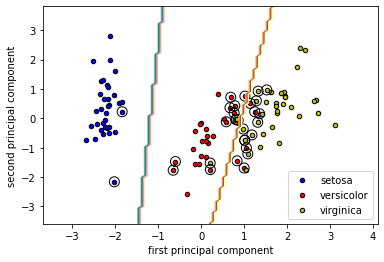

In [36]:
DecisionBoundaryDisplay.from_estimator(model,
X_train_pc,
plot_method='contour',
cmap=plt.cm.Paired,
xlabel='first principal component',
ylabel='second principal component')

# (PCA後の学習データ)
for class_,color in zip(model.classes_, 'bry'):
    idx = np.where(y_train == class_)
    plt.scatter(X_train_pc[idx, 0],
    X_train_pc[idx,1],
    c=color,
    label=class_,
    edgecolor='black',
    s=20)

plt.scatter(model.support_vectors_[:, 0],
model.support_vectors_[:,1],
s=100,
facecolor='none',
linewidth=1,
edgecolor='black')

plt.legend()

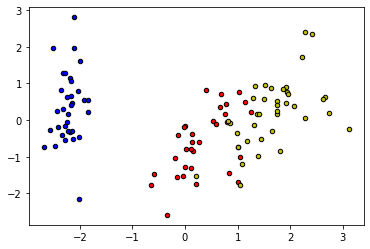

In [31]:
for class_,color in zip(model.classes_, 'bry'):
    idx = np.where(y_train == class_)
    plt.scatter(X_train_pc[idx, 0],
    X_train_pc[idx,1],
    c=color,
    label=class_,
    edgecolor='black',
    s=20)
# idx = [1,2,3,4,5]
# plt.scatter(X_train_pc[idx, 0], X_train_pc[idx, 1],c='b')

In [29]:
plt.scatter(model.support_vectors_[:, 0],
model.support_vectors_[:,1],
s=100,
facecolor='none',
linewidth=1,
eidgecolor='black')


(array([], dtype=int64),)